In [14]:
import pandas as pd
import numpy as np

In [15]:
data=pd.read_csv('card_transdata.csv')

In [18]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [19]:
Fraud=data.loc[data['fraud']==1]
normal=data.loc[data['fraud']==0]

In [20]:
Fraud


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
13,2.131956,56.372401,6.358667,1.0,0.0,0.0,1.0,1.0
24,3.803057,67.241081,1.872950,1.0,0.0,0.0,1.0,1.0
29,15.694986,175.989182,0.855623,1.0,0.0,0.0,1.0,1.0
35,26.711462,1.552008,4.603601,1.0,1.0,0.0,1.0,1.0
36,10.664474,1.565769,4.886521,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
999908,45.296658,0.882736,8.856861,1.0,0.0,0.0,1.0,1.0
999916,167.139756,0.282253,0.308468,1.0,0.0,0.0,1.0,1.0
999919,124.640118,0.004416,0.434885,1.0,0.0,0.0,1.0,1.0
999939,51.412900,3.429330,29.914254,1.0,0.0,0.0,1.0,1.0


In [21]:
Fraud.count()

distance_from_home                87403
distance_from_last_transaction    87403
ratio_to_median_purchase_price    87403
repeat_retailer                   87403
used_chip                         87403
used_pin_number                   87403
online_order                      87403
fraud                             87403
dtype: int64

In [22]:
Fraud.sum()

distance_from_home                5.791487e+06
distance_from_last_transaction    1.111083e+06
ratio_to_median_purchase_price    5.249707e+05
repeat_retailer                   7.692500e+04
used_chip                         2.241000e+04
used_pin_number                   2.730000e+02
online_order                      8.271100e+04
fraud                             8.740300e+04
dtype: float64

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt



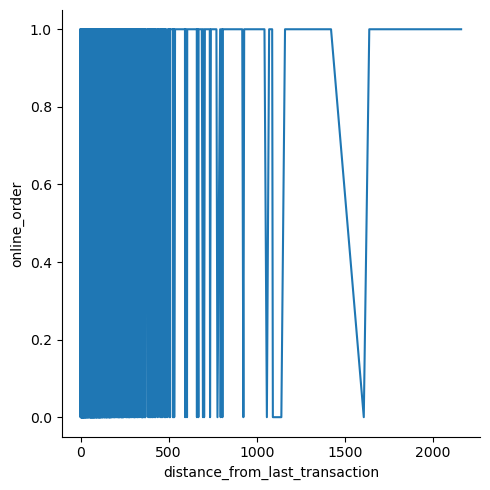

In [28]:
sns.relplot(x="distance_from_last_transaction", y="online_order", kind="line", data=Fraud)
plt.show()


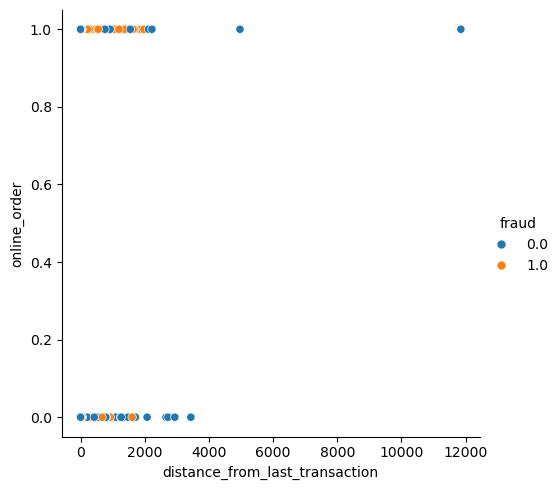

In [30]:
sns.relplot(x="distance_from_last_transaction", y="online_order", hue="fraud", data=data)
plt.show()

In [51]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split


In [52]:
X=data.iloc[:,:-1]
y=data['fraud']

In [53]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.35)

In [54]:
clf=linear_model.LogisticRegression(max_iter=1000)

In [55]:
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [56]:
y_pred=np.array(clf.predict(X_test))
y=np.array(y_test)

In [57]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [58]:
print(confusion_matrix(y_test,y_pred))

[[317234   2235]
 [ 12294  18237]]


In [49]:
print(accuracy_score(y_test,y_pred))

0.9589057142857143


In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    319469
         1.0       0.89      0.60      0.72     30531

    accuracy                           0.96    350000
   macro avg       0.93      0.80      0.85    350000
weighted avg       0.96      0.96      0.95    350000



In [60]:
print(confusion_matrix(y,y_pred))

[[317234   2235]
 [ 12294  18237]]


In [61]:
print(accuracy_score(y,y_pred))

0.9584885714285715


In [62]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    319469
         1.0       0.89      0.60      0.72     30531

    accuracy                           0.96    350000
   macro avg       0.93      0.80      0.85    350000
weighted avg       0.96      0.96      0.95    350000

